In [1]:
import quantecon as qe
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Demonstrate the usage of `qe.LQ_Markov` with the example of the extension to the Barro model.

First, construct the transition matrices and payoff matrices for each Markov state. In this example, we have 2 Markov states.

In [2]:
# Model parameters
Π = np.array([[0.8, 0.2],
              [0.2, 0.8]])

β, Gbar, ρ, σ = 0.95, 5, 0.8, 1

# Basic model matrices
A22 = np.array([[1,    0],
                [Gbar, ρ],])

C2 = np.array([[0],
               [σ]])

Ug = np.array([[0, 1]])

# LQ framework matrices
A_t = np.zeros((1, 3))
A_b = np.hstack((np.zeros((2, 1)), A22))
A = np.vstack((A_t, A_b))

B = np.zeros((3, 1))
B[0, 0] = 1

C = np.vstack((np.zeros((1, 1)), C2))

Sg = np.hstack((np.zeros((1, 1)), Ug))
S1 = np.zeros((1, 3))
S1[0, 0] = 1
S = S1 + Sg

R = S.T @ S

# Small penalty on the debt required to implement the no-Ponzi scheme
R[0, 0] = R[0, 0] + 1e-9

M1 = np.array([[-β - 0.02]])
M2 = np.array([[-β + 0.017]])

Q1 = M1.T @ M1
Q2 = M2.T @ M2
W1 = M1.T @ S
W2 = M2.T @ S

In [3]:
# construct the Markov Jump Linear Quadratic control problem
# stack matrices for each Markov state together as a list
Qs = [Q1, Q2]
Rs = [R, R]
Ns = [W1, W2]
As = [A, A]
Bs = [B, B]
Cs = [C, C]

MJLQBarro1 = qe.LQ_Markov(Π, Qs, Rs, As, Bs, Cs=Cs, Ns=Ns, beta=β)
print(MJLQBarro1)

Markov Jump Linear Quadratic control system
  - beta (discount parameter)       : 0.95
  - T (time horizon)                : infinite
  - m (number of Markov states)     : 2
  - n (number of state variables)   : 3
  - k (number of control variables) : 1
  - j (number of shocks)            : 1



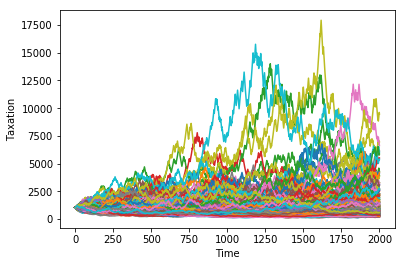

In [4]:
# solve for optimal policies and value functions
MJLQBarro1.stationary_values();

# simulate time series
T = 2000
x0 = np.array([[1000, 1, 25]])
for i in range(250):
    x, u, w, s = MJLQBarro1.compute_sequence(x0, ts_length=T)
    plt.plot(list(range(T+1)), x[0, :])
plt.xlabel('Time')
plt.ylabel('Taxation')
plt.show()

## Compare with the original code in 'lq_markov.py'

Compare the solutions of `qe.LQ_Markov` and `lq_markov.py` to make sure that they are the same.

In [5]:
from quantecon.util.notebooks import fetch_nb_dependencies
fetch_nb_dependencies(['lq_markov.py'],
                      repo='https://github.com/QuantEcon/QuantEcon.notebooks',
                      folder='dependencies')
%run lq_markov.py

Fetching file: lq_markov.py


<Figure size 432x288 with 0 Axes>

In [6]:
# Create namedtuple to keep the R, Q, A, B, C, W matrices for each Markov state
world = namedtuple('world', ['A', 'B', 'C', 'R', 'Q', 'W'])

# Sets up the two states of the world
v1 = world(A=A, B=B, C=C, R=R, Q=Q1, W=W1)
v2 = world(A=A, B=B, C=C, R=R, Q=Q2, W=W2)

MJLQBarro2 = LQ_Markov(β, Π, v1, v2)

### Compare the solution for P matrices

In [7]:
np.max(np.abs(MJLQBarro1.Ps[0] - MJLQBarro2.P[1]))

3.637978807091713e-11

In [8]:
np.max(np.abs(MJLQBarro1.Ps[1] - MJLQBarro2.P[2]))

3.8198777474462986e-11

### Compare the solution for d values

In [9]:
np.max(np.abs(MJLQBarro1.ds[0] - MJLQBarro2.rho[1]))

2.7000623958883807e-13

In [10]:
np.max(np.abs(MJLQBarro1.ds[1] - MJLQBarro2.rho[2]))

2.7000623958883807e-13

### Compare the solution for F matrices

In [11]:
np.max(np.abs(MJLQBarro1.Fs[0] - MJLQBarro2.F[1]))

6.394884621840902e-14

In [12]:
np.max(np.abs(MJLQBarro1.Fs[1] - MJLQBarro2.F[2]))

8.881784197001252e-14